# 03 DT RF XGBOOST LOAN DATASET

# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
df=pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# EDA

* credit.policy - fico
* not.fully.paid - fico
* purpose - not.fully.paid
* int.rate - fico - credit.policy

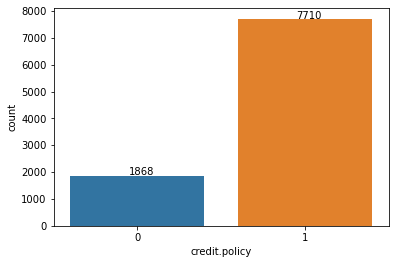

In [5]:
ax=sns.countplot(x='credit.policy',data=df)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+15));

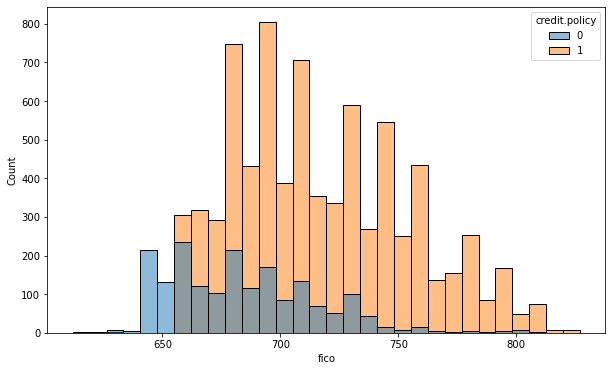

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(x='fico', data=df, hue='credit.policy',bins=30);

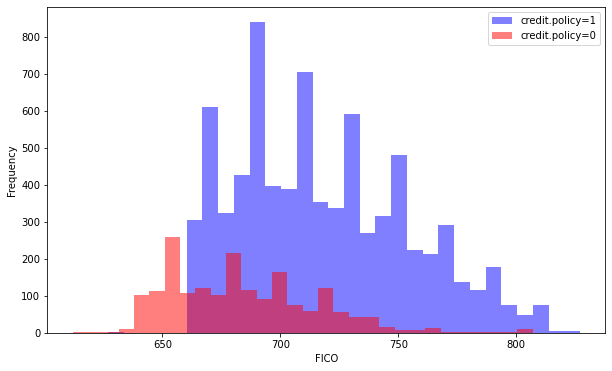

In [7]:
# Alternative with Pandas
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].plot.hist(alpha=0.5,bins=30,color='blue',label='credit.policy=1')
df[df['credit.policy']==0]['fico'].plot.hist(alpha=0.5,bins=30,color='red',label='credit.policy=0')

plt.legend()
plt.xlabel('FICO');

**Create a similar figure, except this time select by the not.fully.paid column.**

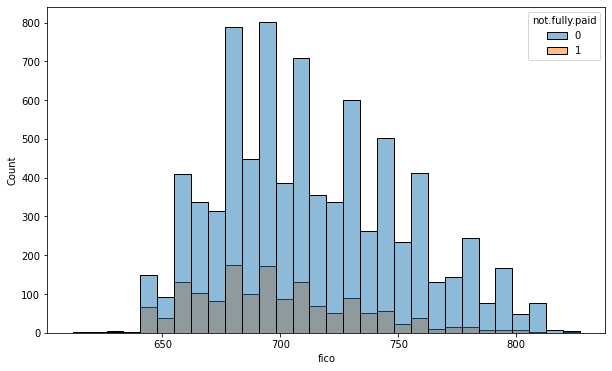

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(x='fico', data=df, hue='not.fully.paid',bins=30);

**Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

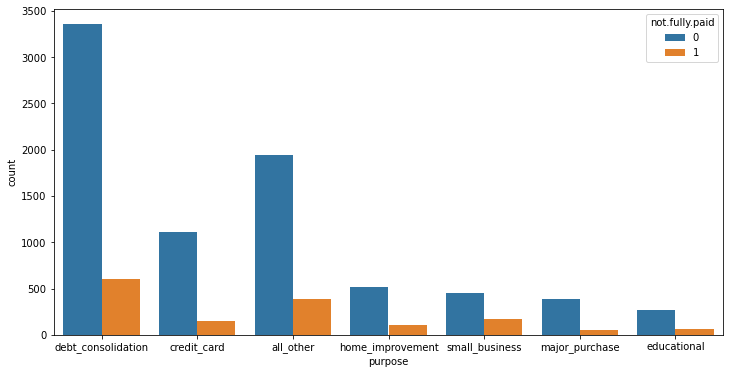

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', data=df, hue='not.fully.paid');

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

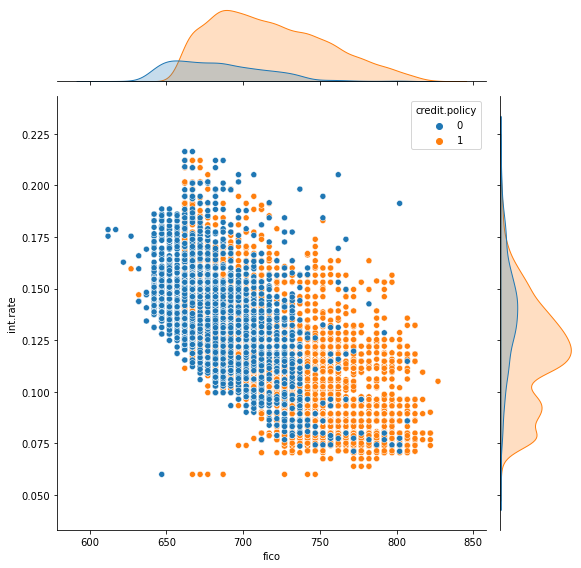

In [10]:
# plt.figure(figsize=(10,10))
sns.jointplot(x='fico', y='int.rate', data=df, kind='scatter',hue='credit.policy',color='purple',height=8);

**Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 792x504 with 0 Axes>

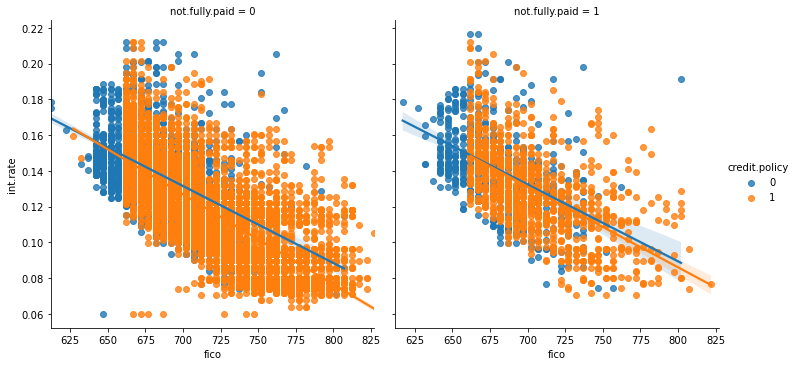

In [11]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',col='not.fully.paid');

## Categorical Features


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [14]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [16]:
df_final=pd.get_dummies(df,drop_first=True)
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

In [17]:
X=df_final.drop(["credit.policy"], axis=1)
y=df_final["credit.policy"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) # stratify=y eklenebilir

## 1-Decision Tree Model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dt_model=DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[363   9]
[   7 1537]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       372
           1       0.99      1.00      0.99      1544

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916



## 2-Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[356  16]
[   8 1536]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       372
           1       0.99      0.99      0.99      1544

    accuracy                           0.99      1916
   macro avg       0.98      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916



### > RF Tunning

In [23]:
rf=RandomForestClassifier()

In [24]:
rf_params = {"n_estimators":[500],
              "max_depth":[15,17,19],
              "max_features": [18],
              "min_samples_split": [4]}

In [25]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.8min finished


In [26]:
rf_cv_model.best_params_

{'max_depth': 15,
 'max_features': 18,
 'min_samples_split': 4,
 'n_estimators': 500}

In [40]:
rf_tuned = RandomForestClassifier(max_depth = 15,             
                                  max_features = 18, 
                                  min_samples_split = 4, 
                                  n_estimators = 500).fit(X_train, y_train)

In [41]:
y_pred = rf_tuned.predict(X_test)
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[361  11]
[   5 1539]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       372
           1       0.99      1.00      0.99      1544

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.99      1916
weighted avg       0.99      0.99      0.99      1916



### > Feature Importance

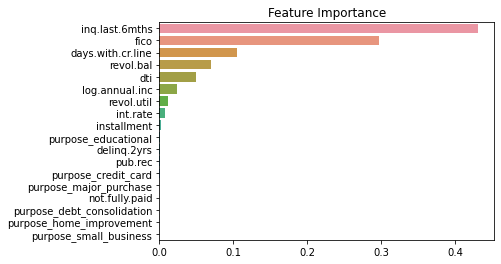

In [42]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

## 3-XGBOOST

In [30]:
from xgboost import XGBClassifier

In [31]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [32]:
y_pred = xgb_model.predict(X_test)

print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[362  10]
[   5 1539]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       372
           1       0.99      1.00      1.00      1544

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.99      1916
weighted avg       0.99      0.99      0.99      1916



### > Tunning XGBOOST

In [33]:
xgb = XGBClassifier()

In [34]:
xgb_params = {"n_estimators": [50,300,500],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,9,17],
             "learning_rate":[0.1,0.01,0.3]}

In [35]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 12.4min finished


In [36]:
xgb_cv_model.best_params_

{'learning_rate': 0.3, 'max_depth': 17, 'n_estimators': 50, 'subsample': 0.8}

In [43]:
xgb_tuned = XGBClassifier(learning_rate= 0.3, 
                                max_depth= 17, 
                                n_estimators= 50, 
                                subsample= 0.8).fit(X_train, y_train)

In [44]:
y_pred = xgb_tuned.predict(X_test)

print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[360  12]
[   5 1539]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       372
           1       0.99      1.00      0.99      1544

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.99      1916
weighted avg       0.99      0.99      0.99      1916



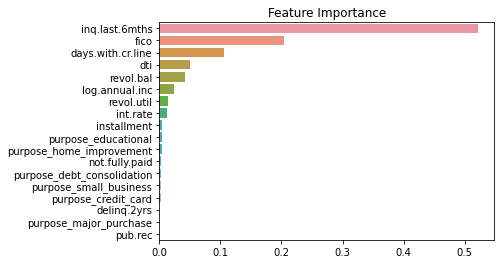

In [45]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()